In [1]:
#import pandas and numpy
import pandas as pd
import numpy as np

In [2]:
#upload data set to colab from desktop
#once uploaded, load data set 

dataset = pd.read_csv("amazon products.csv")
dataset.head(5)

,Uniq Id,Product Name,Brand Name,Asin,Category,Upc Ean Code,List Price,Selling Price,Quantity,Model Number,...,Product Url,Stock,Product Details,Dimensions,Color,Ingredients,Direction To Use,Is Amazon Seller,Size Quantity Variant,Product Description
0,4c69b61db1fc16e7013b43fc926e502d,"DB Longboards CoreFlex Crossbow 41"" Bamboo Fib...",NaN,NaN,Sports & Outdoors | Outdoor Recreation | Skate...,NaN,NaN,$237.68,NaN,NaN,...,https://www.amazon.com/DB-Longboards-CoreFlex-...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
1,66d49bbed043f5be260fa9f7fbff5957,"Electronic Snap Circuits Mini Kits Classpack, ...",NaN,NaN,Toys & Games | Learning & Education | Science ...,NaN,NaN,$99.95,NaN,55324,...,https://www.amazon.com/Electronic-Circuits-Cla...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
2,2c55cae269aebf53838484b0d7dd931a,3Doodler Create Flexy 3D Printing Filament Ref...,NaN,NaN,Toys & Games | Arts & Crafts | Craft Kits,NaN,NaN,$34.99,NaN,NaN,...,https://www.amazon.com/3Doodler-Plastic-Innova...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
3,18018b6bc416dab347b1b7db79994afa,Guillow Airplane Design Studio with Travel Cas...,NaN,NaN,Toys & Games | Hobbies | Models & Model Kits |...,NaN,NaN,$28.91,NaN,142,...,https://www.amazon.com/Guillow-Airplane-Design...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
4,e04b990e95bf73bbe6a3fa09785d7cd0,Woodstock- Collage 500 pc Puzzle,NaN,NaN,Toys & Games | Puzzles | Jigsaw Puzzles,NaN,NaN,$17.49,NaN,62151,...,https://www.amazon.com/Woodstock-Collage-500-p...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN


In [3]:
#wrangle-rows by columns
dataset.shape

(10002, 28)

From this dataset, there are a total of 10002 rows and 28 columns(variables).

In [4]:
#Check variable characteristics
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Uniq Id                10002 non-null  object 
 1   Product Name           10002 non-null  object 
 2   Brand Name             0 non-null      float64
 3   Asin                   0 non-null      float64
 4   Category               9172 non-null   object 
 5   Upc Ean Code           34 non-null     object 
 6   List Price             0 non-null      float64
 7   Selling Price          9895 non-null   object 
 8   Quantity               0 non-null      float64
 9   Model Number           8232 non-null   object 
 10  About Product          9729 non-null   object 
 11  Product Specification  8370 non-null   object 
 12  Technical Details      9212 non-null   object 
 13  Shipping Weight        8864 non-null   object 
 14  Product Dimensions     479 non-null    object 
 15  Im

In [5]:
# Check for duplicates
dataset.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
9997     False
9998     False
9999     False
10000    False
10001    False
Length: 10002, dtype: bool

All 10002 rows are unique. 

In [6]:
#Dropping redundant columns
cols = [0,2,3,5,6,8,9,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27]
dataset.drop(dataset.columns[cols], axis =1, inplace=True)

Columns 2,3,6,8,17,19-24,26,27 only contains null values (not useful).
Columns 1,5,9,12,14-16,18,25 are not helpful with achieving our objectives. 

In [7]:
# dropping null values to avoid errors 
dataset.dropna(inplace = True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7216 entries, 0 to 10001
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Product Name           7216 non-null   object
 1   Category               7216 non-null   object
 2   Selling Price          7216 non-null   object
 3   About Product          7216 non-null   object
 4   Product Specification  7216 non-null   object
 5   Shipping Weight        7216 non-null   object
dtypes: object(6)
memory usage: 394.6+ KB


In [8]:
# new data frame with split value columns. We use n = 3 to get a maximum of 3+1 columns
new = dataset["Category"].str.split("|", n = 3, expand = True)
  
# making the first category called Main Category
dataset["Main Category"]= new[0] 
  
# making the second category called sub_category 
dataset["Sub-Category"]= new[1]

# making the third category called side_category 
dataset["Side Category"]= new[2]

# making the last column consist of the remaining categories
dataset["Other Categories"]= new[3]

# Dropping old category columns and the remaining categories 
dataset.drop(columns =["Category", "Other Categories"], inplace = True)

In [9]:
# Revised dataset to conduct EDA
dataset.head()

,Product Name,Selling Price,About Product,Product Specification,Shipping Weight,Main Category,Sub-Category,Side Category
0,"DB Longboards CoreFlex Crossbow 41"" Bamboo Fib...",$237.68,Make sure this fits by entering your model num...,Shipping Weight: 10.7 pounds (View shipping ra...,10.7 pounds,Sports & Outdoors,Outdoor Recreation,"Skates, Skateboards & Scooters"
1,"Electronic Snap Circuits Mini Kits Classpack, ...",$99.95,Make sure this fits by entering your model num...,Product Dimensions: 14.7 x 11.1 x 10.2...,4 pounds,Toys & Games,Learning & Education,Science Kits & Toys
2,3Doodler Create Flexy 3D Printing Filament Ref...,$34.99,Make sure this fits by entering your model num...,ProductDimensions:10.3x3.4x0.8inches|ItemWeigh...,12.8 ounces,Toys & Games,Arts & Crafts,Craft Kits
3,Guillow Airplane Design Studio with Travel Cas...,$28.91,Make 8 different Planes at one time. | Experim...,ProductDimensions:3.5x6.2x13inches|ItemWeight:...,13.4 ounces,Toys & Games,Hobbies,Models & Model Kits
4,Woodstock- Collage 500 pc Puzzle,$17.49,Make sure this fits by entering your model num...,ProductDimensions:1.9x8x10inches|ItemWeight:13...,13.4 ounces,Toys & Games,Puzzles,Jigsaw Puzzles


In [10]:
dataset.rename(columns = {'Uniq Id':'Id','Shipping Weight':'Shipping Weight(Pounds)', 'Selling Price':'Selling Price($)'}, inplace = True)

dataset['Shipping Weight(Pounds)'] = dataset['Shipping Weight(Pounds)'].str.strip('ounces')
dataset['Shipping Weight(Pounds)'] = dataset['Shipping Weight(Pounds)'].str.strip('pounds').astype(float)
dataset['Selling Price($)'] = dataset['Selling Price($)'].str.replace('$', '').astype(float)

dataset.head()

/home/tcc/anaconda3/envs/tcc/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """


,Product Name,Selling Price($),About Product,Product Specification,Shipping Weight(Pounds),Main Category,Sub-Category,Side Category
0,"DB Longboards CoreFlex Crossbow 41"" Bamboo Fib...",237.68,Make sure this fits by entering your model num...,Shipping Weight: 10.7 pounds (View shipping ra...,10.7,Sports & Outdoors,Outdoor Recreation,"Skates, Skateboards & Scooters"
1,"Electronic Snap Circuits Mini Kits Classpack, ...",99.95,Make sure this fits by entering your model num...,Product Dimensions: 14.7 x 11.1 x 10.2...,4.0,Toys & Games,Learning & Education,Science Kits & Toys
2,3Doodler Create Flexy 3D Printing Filament Ref...,34.99,Make sure this fits by entering your model num...,ProductDimensions:10.3x3.4x0.8inches|ItemWeigh...,12.8,Toys & Games,Arts & Crafts,Craft Kits
3,Guillow Airplane Design Studio with Travel Cas...,28.91,Make 8 different Planes at one time. | Experim...,ProductDimensions:3.5x6.2x13inches|ItemWeight:...,13.4,Toys & Games,Hobbies,Models & Model Kits
4,Woodstock- Collage 500 pc Puzzle,17.49,Make sure this fits by entering your model num...,ProductDimensions:1.9x8x10inches|ItemWeight:13...,13.4,Toys & Games,Puzzles,Jigsaw Puzzles


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7216 entries, 0 to 10001
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product Name             7216 non-null   object 
 1   Selling Price($)         7216 non-null   float64
 2   About Product            7216 non-null   object 
 3   Product Specification    7216 non-null   object 
 4   Shipping Weight(Pounds)  7216 non-null   float64
 5   Main Category            7216 non-null   object 
 6   Sub-Category             7216 non-null   object 
 7   Side Category            6231 non-null   object 
dtypes: float64(2), object(6)
memory usage: 507.4+ KB


Selling Price($) & Shipping Weight(Pounds) have been converted to Float from Object

In [12]:
# Start of EDA
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
# finding out the unique main categories
dataset["Main Category"].unique()

array(['Sports & Outdoors ', 'Toys & Games ',
       'Clothing, Shoes & Jewelry ', 'Home & Kitchen ', 'Pet Supplies ',
       'Arts, Crafts & Sewing ', 'Electronics ', 'Patio, Lawn & Garden ',
       'Tools & Home Improvement ', 'Office Products ', 'Baby Products ',
       'Grocery & Gourmet Food ', 'Video Games ',
       'Remote & App Controlled Vehicle Parts ', 'Health & Household ',
       'Industrial & Scientific ', 'Beauty & Personal Care ',
       'Automotive ', 'Remote & App Controlled Vehicles & Parts ',
       'Musical Instruments ', 'Hobbies ', 'Movies & TV ',
       'Cell Phones & Accessories '], dtype=object)

Text(0, 0.5, 'Count of products')

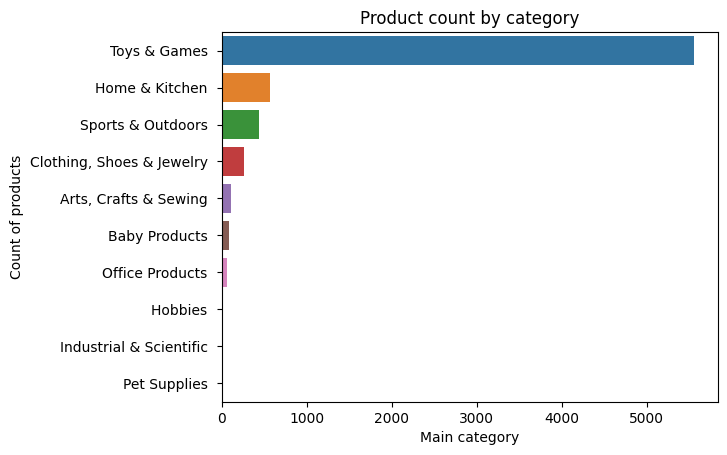

In [14]:
#data visualisation

#lets look at patterns in terms of Product Category popularity
#generate count for "Main Category"

#Top 10 barplot of categories
order = dataset['Main Category'].value_counts()[:10].index
sns.countplot(y='Main Category', data=dataset, order=order)
plt.title("Product count by category")
plt.xlabel("Main category")
plt.ylabel("Count of products")

The top 5 Category: 
1.Toys & Games
2.Home & Kitchen
3.Sports & Outdoors
4.Clothing, Shoes & Jewelry
5.Arts, Crafts & Sewing

Text(0.5, 1.0, 'Distribution of the Prices in Toys & Games Category')

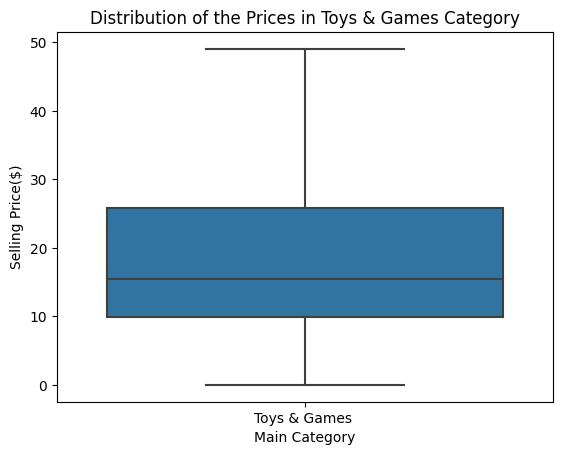

In [15]:
#generate boxplot to understand the distribution  
toys = dataset[dataset["Main Category"] == 'Toys & Games ']
sns.boxplot(data = toys, x='Main Category', y='Selling Price($)', showfliers=False)
plt.title("Distribution of the Prices in Toys & Games Category")

Text(0.5, 1.0, 'Relationship between Price & Shipping Weight in Toys & Games category')

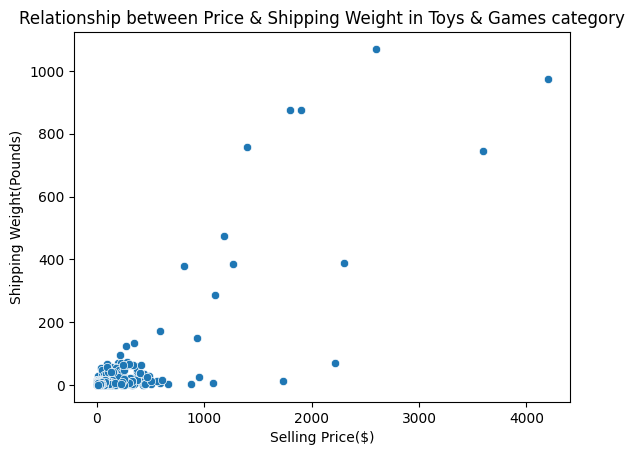

In [16]:
#generate scatterplot to understand the relationship 
sns.scatterplot(data=toys, x="Selling Price($)", y="Shipping Weight(Pounds)")
plt.title("Relationship between Price & Shipping Weight in Toys & Games category")

We cant really draw a conclusion from the lower shipping weight. but for heavier items some of them seems to be positively related to the selling pricer.

Text(0.5, 1.0, 'Distribution of the Prices in Home & Kitchen Category')

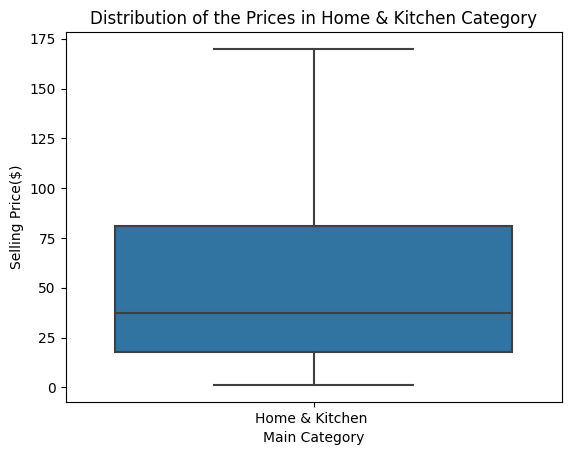

In [17]:
#generate boxplot to understand the distribution  
home = dataset[dataset["Main Category"] == 'Home & Kitchen ']
sns.boxplot(data = home, x='Main Category', y='Selling Price($)', showfliers=False)
plt.title("Distribution of the Prices in Home & Kitchen Category")

Text(0.5, 1.0, 'Relationship between Price & Shipping Weight in Home & Kitchen Category')

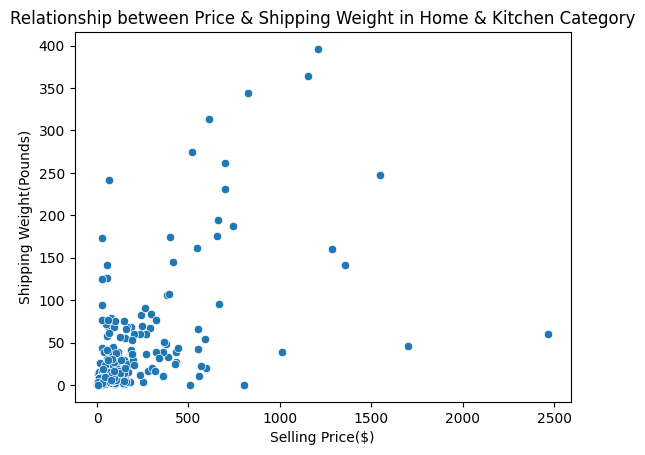

In [18]:
#generate scatterplot to understand the relationship
sns.scatterplot(data=home, x="Selling Price($)", y="Shipping Weight(Pounds)")
plt.title("Relationship between Price & Shipping Weight in Home & Kitchen Category")

Text(0.5, 1.0, 'Distribution of the Prices in Sports & Outdoors Category')

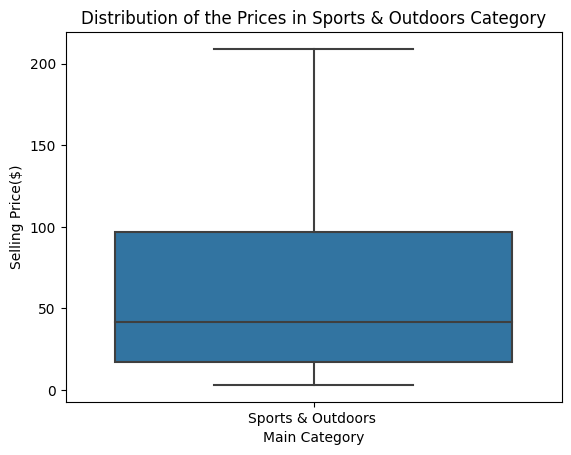

In [19]:
#generate boxplot to understand the distribution  
sports = dataset[dataset["Main Category"] == 'Sports & Outdoors ']
sns.boxplot(data = sports, x='Main Category', y='Selling Price($)', showfliers=False)
plt.title("Distribution of the Prices in Sports & Outdoors Category")

Text(0.5, 1.0, 'Relationship between Price & Shipping Weight in Sports & Outdoors Category')

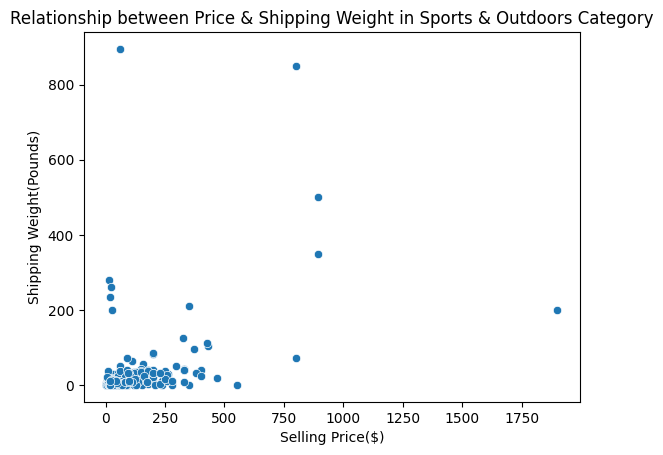

In [20]:
#generate scatterplot to understand the relationship
sns.scatterplot(data=sports, x="Selling Price($)", y="Shipping Weight(Pounds)")
plt.title("Relationship between Price & Shipping Weight in Sports & Outdoors Category")

Text(0.5, 1.0, 'Distribution of the Prices in Clothing, Shoes & Jewelry Category')

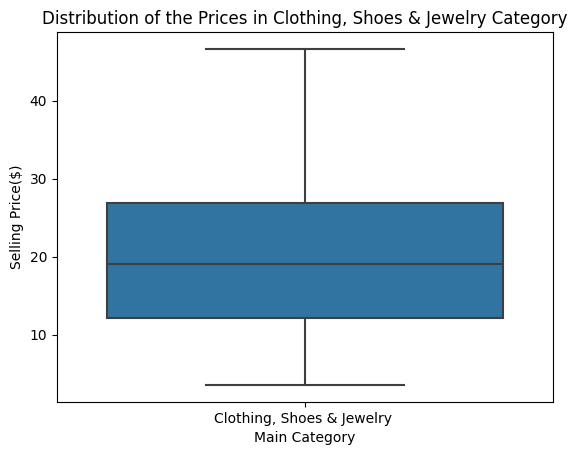

In [21]:
#generate boxplot to understand the distribution  
csj = dataset[dataset["Main Category"] == 'Clothing, Shoes & Jewelry ']
sns.boxplot(data = csj, x='Main Category', y='Selling Price($)', showfliers=False)
plt.title("Distribution of the Prices in Clothing, Shoes & Jewelry Category")

Text(0.5, 1.0, 'Relationship between Price & Shipping Weight in Clothing, Shoes & Jewelry Category')

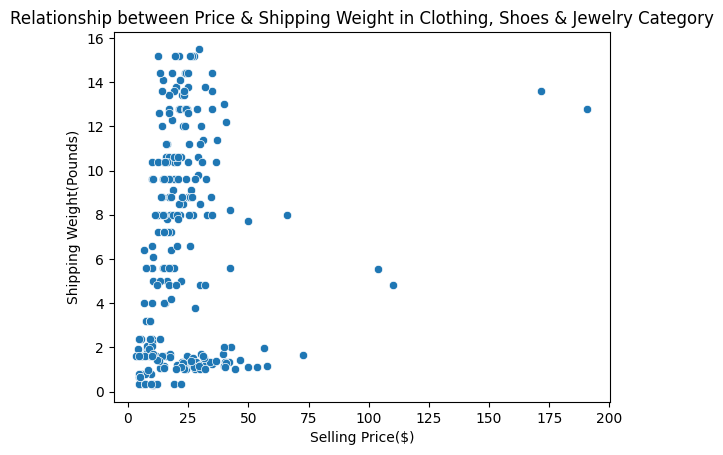

In [22]:
#generate scatterplot to understand the relationship
sns.scatterplot(data=csj, x="Selling Price($)", y="Shipping Weight(Pounds)")
plt.title("Relationship between Price & Shipping Weight in Clothing, Shoes & Jewelry Category")

Text(0.5, 1.0, 'Distribution of the Prices in Arts, Crafts & Sewing Category')

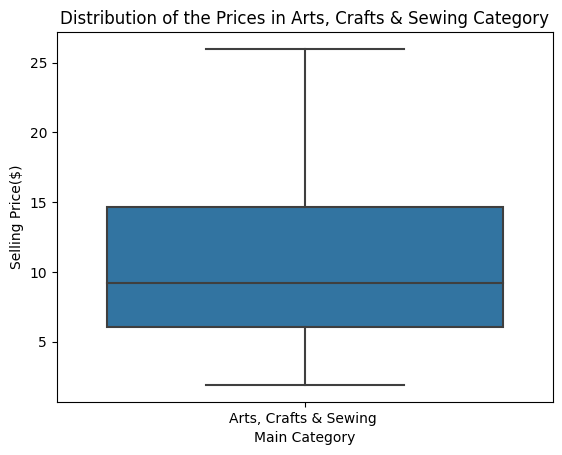

In [23]:
#generate boxplot to understand the distribution  
artscraft = dataset[dataset["Main Category"] == 'Arts, Crafts & Sewing ']
sns.boxplot(data = artscraft, x='Main Category', y='Selling Price($)', showfliers=False)
plt.title("Distribution of the Prices in Arts, Crafts & Sewing Category")

Text(0.5, 1.0, 'Relationship between Price & Shipping Weight in Arts, Crafts & Sewing Category')

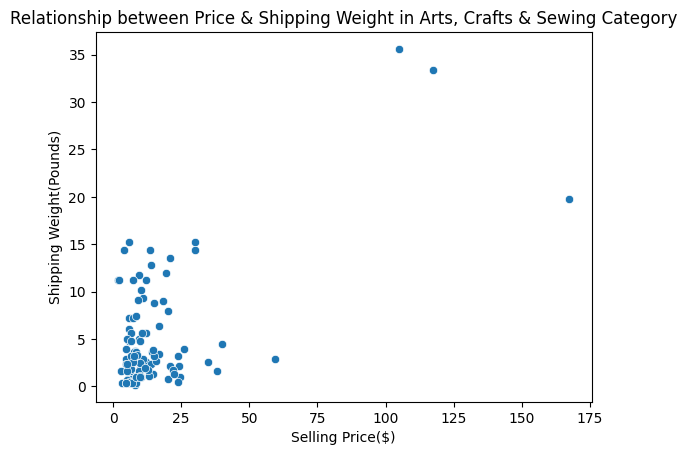

In [24]:
#generate scatterplot to understand the relationship
sns.scatterplot(data=artscraft, x="Selling Price($)", y="Shipping Weight(Pounds)")
plt.title("Relationship between Price & Shipping Weight in Arts, Crafts & Sewing Category")

Conclusion: From this EDA, we can draw that there is little relation between the shipping weight and the selling price of the product. Therefore, we decided that a more suitable way of recommending products would be by their types which is in this case is through their Categories.....

Denzel's Portion: 
Recommendation System - Content-Based Filtering

In [25]:
dataset = pd.read_csv("amazon products.csv")

In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Uniq Id                10002 non-null  object 
 1   Product Name           10002 non-null  object 
 2   Brand Name             0 non-null      float64
 3   Asin                   0 non-null      float64
 4   Category               9172 non-null   object 
 5   Upc Ean Code           34 non-null     object 
 6   List Price             0 non-null      float64
 7   Selling Price          9895 non-null   object 
 8   Quantity               0 non-null      float64
 9   Model Number           8232 non-null   object 
 10  About Product          9729 non-null   object 
 11  Product Specification  8370 non-null   object 
 12  Technical Details      9212 non-null   object 
 13  Shipping Weight        8864 non-null   object 
 14  Product Dimensions     479 non-null    object 
 15  Im

# Word Processing

We can compute the similarity between categories using TfidfVectorizer

In [27]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
dataset["Category"] = dataset["Category"].fillna("")

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(dataset["Category"])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(10002, 1133)

We can observe that there are 1133 vocabularies in our dataset of 10002 products.

In [28]:
# We can look at some of the features.
tfidf.get_feature_names()[0:20]

/home/tcc/anaconda3/envs/tcc/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['accent',
 'accents',
 'accessories',
 'accessory',
 'action',
 'activities',
 'activity',
 'additives',
 'adhesives',
 'adirondack',
 'adult',
 'advent',
 'agility',
 'aids',
 'air',
 'airbrush',
 'aircraft',
 'airplane',
 'airplanes',
 'albums']

We will use this matrix to calculate the similarity score with linear kernel, cosine similarity and sigmoid score.

# Computing similarity score

In [29]:
# Import linear_kernel, cosine_similarity, and sigmoid_kernel
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import sigmoid_kernel

# Create the matrix
linear = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
sig_score = sigmoid_kernel(tfidf_matrix, tfidf_matrix)

In [30]:
print(linear.shape)
print(cosine_sim.shape)
print(sig_score.shape)

(10002, 10002)
(10002, 10002)
(10002, 10002)


In [31]:
print(linear[1])
print(cosine_sim[1])
print(sig_score[1])

[0.         1.         0.27876877 ... 0.25244281 0.27876877 0.        ]
[0.         1.         0.27876877 ... 0.25244281 0.27876877 0.        ]
[0.76159416 0.76196458 0.76169747 ... 0.76168771 0.76169747 0.76159416]


This matrix represents each product category's similarity score with every other product category.

# Input / output function

We need to define a function that takes the product name as an input and outputs a list of the 10 most similar products. For this we need a reverse mapping of products and DataFrame indices. This means we need a mechanism to identify the index of a product in our DataFrame.

In [32]:
#Construct a reverse map of indices and product names
indices = pd.Series(dataset.index, index=dataset["Product Name"])

In [33]:
indices[:20]

Product Name
DB Longboards CoreFlex Crossbow 41" Bamboo Fiberglass Longboard Complete                                                                             0
Electronic Snap Circuits Mini Kits Classpack, FM Radio, Motion Detector, Music Box (Set of 5)                                                        1
3Doodler Create Flexy 3D Printing Filament Refill Bundle (X5 Pack, Over 1000'. of Extruded Plastics! - Innovate                                      2
Guillow Airplane Design Studio with Travel Case Building Kit                                                                                         3
Woodstock- Collage 500 pc Puzzle                                                                                                                     4
Terra by Battat – 4 Dinosaur Toys, Medium – Dinosaurs for Kids & Collectors, Scientifically Accurate & Designed by A Paleo-Artist; Age 3+ (4 Pc)     5
Rubie's Child's Pokemon Deluxe Pikachu Costume, X-Small                          

In [34]:
# Function that takes in product name as input and outputs most similar product
def rec_lin(product_name, linear=linear):
    # Get the index of the product that matches the product name
    idx = indices[product_name]

    # Get the pairwise similarity scores
    # Enumerate adds a counter to the iterable and lets it be converted into a list of tuples
    sim_scores = list(enumerate(linear[idx]))

    # Sort the products based on the similarity scores
    # Reverse gives us the similarity scores in descending order
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the scores of the 10 most similar products
    sim_scores = sim_scores[1:11]

    # Get the product indices
    product_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar products
    # iloc allows us to retrieve rows from a data frame
    return dataset[["Product Name","Selling Price"]].iloc[product_indices]

In [35]:
name = input("What would you like to search for today? ")
result = rec_lin(name)
print(result)

KeyError: 'cube'